In [11]:
import ares
from millicharge.params import LCDMParams, DMBParams, ARESParams

sigma = 5e-40
verbose = False

lcdm_cosmo = LCDMParams()
dmb_cosmo = DMBParams(sigma_dmb=sigma)

lcdm = ARESParams(lcdm_cosmo, verbose=verbose)
dmb = ARESParams(dmb_cosmo, verbose=verbose)
dmb_newpk = ARESParams(dmb_cosmo, use_classy_pk=True, verbose=verbose)

sim_lcdm = ares.simulations.Global21cm(**lcdm.all_kwargs)
sim_dmb = ares.simulations.Global21cm(**dmb.all_kwargs)
sim_dmb_newpk = ares.simulations.Global21cm(**dmb_newpk.all_kwargs)

Using DMBParams.  Setting include_dm to True.
Using DMBParams.  Setting include_dm to True.


In [12]:
import numpy as np

def test_sim(sim):
    halos = sim.pops[0].halos
    for attr in ["tab_k_lin", "tab_ps_lin", "tab_ngtm", "tab_M"]:
        val = getattr(halos, attr)
        try:
            assert np.isnan(val).sum() == 0
        except AssertionError:
            raise(f'Failed at {attr}, which has some nans.')
        
# test_sim(sim_lcdm)
test_sim(sim_dmb)
test_sim(sim_dmb_newpk)

None
None


In [13]:
sim_dmb.run()
sim_dmb_newpk.run()    
# sim_lcdm.run()

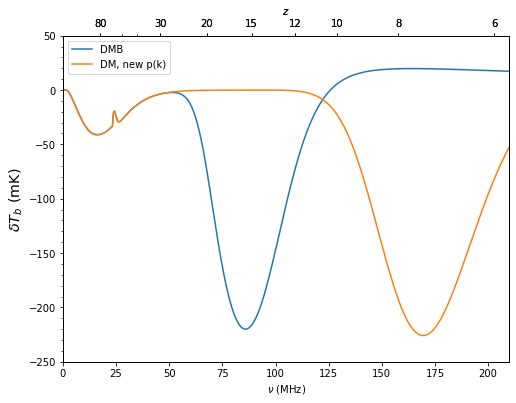

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

# sim_lcdm.GlobalSignature(ax=ax, label=r'LCDM')
sim_dmb.GlobalSignature(ax=ax, label=r'DMB')
sim_dmb_newpk.GlobalSignature(ax=ax, label='DM, new p(k)')

ax.legend()

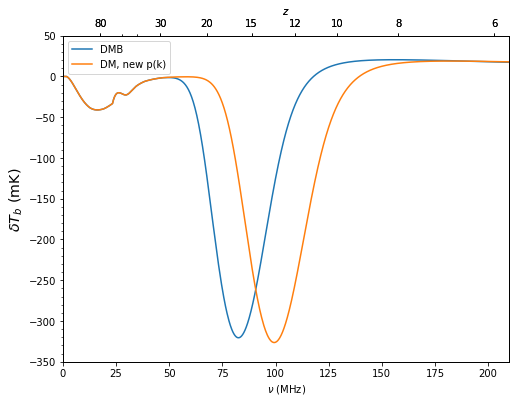

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

# sim_lcdm.GlobalSignature(ax=ax, label=r'LCDM')
sim_dmb.GlobalSignature(ax=ax, label=r'DMB')
sim_dmb_newpk.GlobalSignature(ax=ax, label='DM, new p(k)')

ax.legend()

In [11]:
!say 'I am done.'

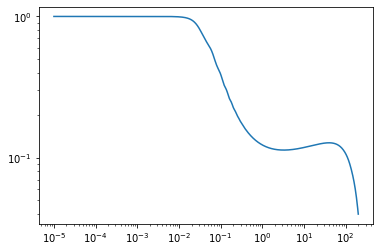

In [28]:
import numpy as np
import matplotlib.pyplot as plt

k = np.logspace(-5, np.log10(200), 1000)

pk_dmb = dmb_newpk.classy.get_pk_array(k, np.array([0.]), len(k), 1, False)
pk_lcdm = lcdm.classy.get_pk_array(k, np.array([0.]), len(k), 1, False)

# plt.loglog(k, pk_dmb, label='dmb')
# plt.loglog(k, pk_lcdm, label='lcdm')

plt.loglog(k, pk_dmb/pk_lcdm)

# plt.legend()